<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%205%20-%20EDA%20data%20visualization%20and%20preparation/EDA%20project/S%26P500%202024%20analysis%20%7C%20EDA%20final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>EDA Final project - Yahoo Finance S&P500 2024 analysis<u/>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

##<u>**Part 1**<u/>

In [ ]:
# Importing S&P500 data for all of 2024 (Ticker : VOO)
snp = yf.download("VOO", start = '2024-01-01', end = '2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
snp

Price,Close,High,Low,Open,Volume
Ticker,VOO,VOO,VOO,VOO,VOO
Date,,,,,
2024-01-02,428.376923,429.620548,426.748314,428.278214,9076000
2024-01-03,425.198700,427.380007,424.665700,426.708841,4805000
2024-01-04,423.856354,427.162880,423.639208,424.744666,3945300
2024-01-05,424.399200,426.689066,423.076596,424.014248,5723100
2024-01-08,430.469360,430.607528,424.784111,424.863090,7222400
...,...,...,...,...,...
2024-12-23,547.190002,547.359985,540.320007,543.309998,7063400
2024-12-24,552.820007,552.900024,547.539978,548.059998,3439300


In [ ]:
# Removing the 'Ticker' column level leaving only the 'Price' level
# The 'Ticker' level has no valuable information becouse all the information in this DF is about the same ticker
snp.columns = snp.columns.get_level_values(0)

In [ ]:
snp

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,428.376923,429.620548,426.748314,428.278214,9076000
2024-01-03,425.198700,427.380007,424.665700,426.708841,4805000
2024-01-04,423.856354,427.162880,423.639208,424.744666,3945300
2024-01-05,424.399200,426.689066,423.076596,424.014248,5723100
2024-01-08,430.469360,430.607528,424.784111,424.863090,7222400
...,...,...,...,...,...
2024-12-23,547.190002,547.359985,540.320007,543.309998,7063400
2024-12-24,552.820007,552.900024,547.539978,548.059998,3439300
2024-12-26,552.809998,553.969971,549.919983,551.200012,4492000


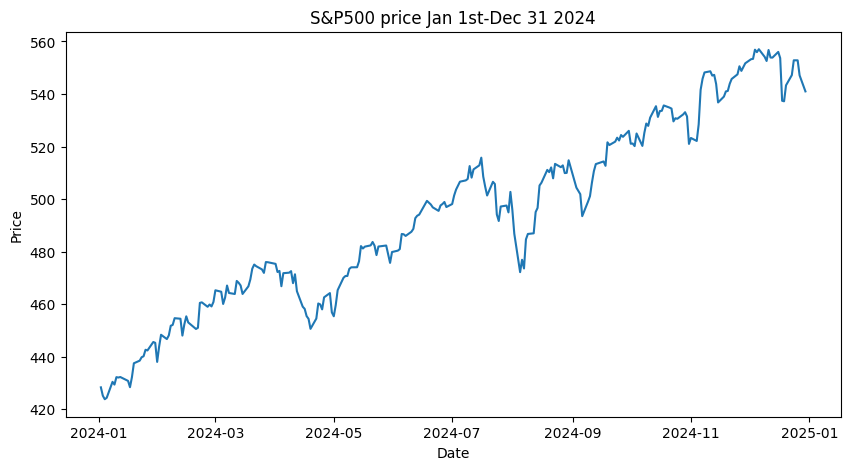

In [ ]:
# Plot the graph of the S&P500 throught 2024
plt.figure(figsize=(10, 5))
plt.plot(snp.index, snp['Close'])


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P500 price Jan 1st-Dec 31 2024')
plt.show()


##<u>**Part 2**<u/>

In [ ]:
snp.head(5)

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,428.376923,429.620548,426.748314,428.278214,9076000
2024-01-03,425.198700,427.380007,424.665700,426.708841,4805000
2024-01-04,423.856354,427.162880,423.639208,424.744666,3945300
2024-01-05,424.399200,426.689066,423.076596,424.014248,5723100
2024-01-08,430.469360,430.607528,424.784111,424.863090,7222400


In [ ]:
snp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


##<u>**Part 3**<u/>

In [ ]:
# A function to retrive the price type of the stock in a specified date
# I will use this function alot in this code
def get_stock_statistics(date_type, date: str | int, type_of_data: str):
    """
    This function takes a date and the type of data you need from that date
    and returns the data you requested.
    Types of data:
        - Adj Close
        - Close
        - High
        - Low
        - Open
        - Volume

    Date formats:
        - "full" : "YYYY-MM-DD": str
        - "month" : M: int
        - "day" : D: int
    """

    date_type = date_type.lower()
    type_of_data = type_of_data.capitalize()

    if date_type == "full":
        return snp[snp.index == date][type_of_data].values[0]
    elif date_type == "month":
        return snp[snp.index.month == date][type_of_data]
    elif date_type == "day":
        return snp[snp.index.day == date][type_of_data]

### What was the price on Daniel's birthday? Saturday July 27, 2024

In [ ]:
# Find the price at a given date (type: float)
daniel_price = get_stock_statistics("full", '2024-07-26', "Close").mean() # 27.07.2024 was a Saturday so I took a day before
# Print the data in visuly apealing format
print(f"${daniel_price:.2f}")

$497.18


### What was the price on Sivan's birthday? Saturday Novemer 7, 2024

In [ ]:
# Find the price at a given date (type: float)
sivan_price = get_stock_statistics("full", '2024-11-07', "Close").mean()
# Print the data in visuly apealing format
print(f"${sivan_price:.2f}")

$545.78


---
##What the price at the start of each quarter?

####Q1

In [ ]:
q1_price = get_stock_statistics("full", '2024-01-02', "Open") # In 2024 trading started on the 2nd of January
print(f"${q1_price:.2f}")

$428.28


####Q2

In [ ]:
q1_price = get_stock_statistics("full", '2024-04-01', "Open")
print(f"${q1_price:.2f}")

$476.72


####Q3

In [ ]:
q1_price = get_stock_statistics("full", '2024-07-01', "Open")
print(f"${q1_price:.2f}")

$498.34


####Q4

In [ ]:
q1_price = get_stock_statistics("full", '2024-10-01', "Open")
print(f"${q1_price:.2f}")

$525.36


---
###April Avarages

In [ ]:
# Save all the April statisitics in to variables and then print it
apr_open_mean = get_stock_statistics('month', 4, 'Open').mean()
apr_close_mean = get_stock_statistics('month', 4, 'Close').mean()
apr_high_mean = get_stock_statistics('month', 4, 'High').mean()
apr_low_mean = get_stock_statistics('month', 4, 'Low').mean()
apr_volume_mean = get_stock_statistics('month', 4, 'Volume').mean()

In [ ]:
print("April Avarages :")
print(f"Open : ${apr_open_mean:.2f}")
print(f"Close : ${apr_close_mean:.2f}")
print(f"High : ${apr_high_mean:.2f}")
print(f"Low : ${apr_low_mean:.2f}")
print(f"Vloume : {int(apr_volume_mean)} stocks per day")

April Avarages :
Open : $464.92
Close : $463.75
High : $466.77
Low : $461.54
Vloume : 6010645 stocks per day


In [ ]:
snp.describe()

Price,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,493.785317,495.854111,491.385191,493.783532,5.423427e+06
std,35.322138,35.468906,35.255039,35.487073,3.622692e+06
min,423.856354,426.689066,423.076596,424.014248,2.131100e+06
25%,465.341492,469.028817,463.598718,465.933040,3.664100e+06
50%,494.948730,498.285868,492.633413,495.226984,4.609500e+06
75%,521.998627,524.321753,520.444183,522.874489,5.916850e+06
max,557.037048,558.173426,556.299419,556.927407,3.541800e+07


---
##Statistics per month

###Calculating the numbers and shwoing them in a bar plot

####January

In [ ]:
# Save all the January statisitics in to variables
jan_open_mean = get_stock_statistics('month', 1, 'Open').mean()
jan_close_mean = get_stock_statistics('month', 1, 'Close').mean()
jan_high_mean = get_stock_statistics('month', 1, 'Close').mean()
jan_low_mean = get_stock_statistics('month', 1, 'Close').mean()
jan_volume_mean = get_stock_statistics('month', 1, 'Volume').mean()

# Print the statistics
print("January Avarages :")
print(f"Open : ${jan_open_mean:.2f}")
print(f"Close : ${jan_close_mean:.2f}")
print(f"High : ${jan_high_mean:.2f}")
print(f"Low : ${jan_low_mean:.2f}")
print(f"Vloume : {int(jan_volume_mean)} stocks per day")

January Avarages :
Open : $433.88
Close : $434.29
High : $434.29
Low : $434.29
Vloume : 5391885 stocks per day


####February

In [ ]:
# Save all the February statisitics in to variables
feb_open_mean = get_stock_statistics('month', 2, 'Open').mean()
feb_close_mean = get_stock_statistics('month', 2, 'Close').mean()
feb_high_mean = get_stock_statistics('month', 2, 'High').mean()
feb_low_mean = get_stock_statistics('month', 2, 'Low').mean()
feb_volume_mean = get_stock_statistics('month', 2, 'Volume').mean()

# Print the statistics
print("February Avarages :")
print(f"Open : ${feb_open_mean:.2f}")
print(f"Close : ${feb_close_mean:.2f}")
print(f"High : ${feb_high_mean:.2f}")
print(f"Low : ${feb_low_mean:.2f}")
print(f"Vloume : {int(feb_volume_mean)} stocks per day")

February Avarages :
Open : $452.81
Close : $453.55
High : $454.61
Low : $451.24
Vloume : 5173430 stocks per day


####March

In [ ]:
# Save all the March statisitics in to variables
mar_open_mean = get_stock_statistics('month', 3, 'Open').mean()
mar_close_mean = get_stock_statistics('month', 3, 'Close').mean()
mar_high_mean = get_stock_statistics('month', 3, 'High').mean()
mar_low_mean = get_stock_statistics('month', 3, 'Low').mean()
mar_volume_mean = get_stock_statistics('month', 3, 'Low').mean()

# Print the statistics
print("March Avarages :")
print(f"Open : ${mar_open_mean:.2f}")
print(f"Close : ${mar_close_mean:.2f}")
print(f"High : ${mar_high_mean:.2f}")
print(f"Low : ${mar_low_mean:.2f}")
print(f"Vloume : {int(mar_volume_mean)} stocks per day")

March Avarages :
Open : $468.49
Close : $468.63
High : $470.17
Low : $466.73
Vloume : 466 stocks per day


####April

In [ ]:
# Save all the April statisitics in to variables
apr_open_mean = get_stock_statistics('month', 4, 'Open').mean()
apr_close_mean = get_stock_statistics('month', 4, 'Close').mean()
apr_high_mean = get_stock_statistics('month', 4, 'High').mean()
apr_low_mean = get_stock_statistics('month', 4, 'Low').mean()
apr_volume_mean = get_stock_statistics('month', 4, 'Volume').mean()

# Print the statistics
print("April Avarages :")
print(f"Open : ${apr_open_mean:.2f}")
print(f"Close : ${apr_close_mean:.2f}")
print(f"High : ${apr_high_mean:.2f}")
print(f"Low : ${apr_low_mean:.2f}")
print(f"Vloume : {int(apr_volume_mean)} stocks per day")

April Avarages :
Open : $464.92
Close : $463.75
High : $466.77
Low : $461.54
Vloume : 6010645 stocks per day


####May

In [ ]:
# Save all the May statisitics in to variables
may_open_mean = get_stock_statistics('month', 5, 'Open').mean()
may_close_mean = get_stock_statistics('month', 5, 'Close').mean()
may_high_mean = get_stock_statistics('month', 5, 'High').mean()
may_low_mean = get_stock_statistics('month', 5, 'Low').mean()
may_volume_mean = get_stock_statistics('month', 5, 'Volume').mean()

# Print the statistics
print("May Avarages :")
print(f"Open : ${may_open_mean:.2f}")
print(f"Close : ${may_close_mean:.2f}")
print(f"High : ${may_high_mean:.2f}")
print(f"Low : ${may_low_mean:.2f}")
print(f"Vloume : {int(may_volume_mean)} stocks per day")

May Avarages :
Open : $475.14
Close : $475.50
High : $476.93
Low : $473.30
Vloume : 3789881 stocks per day


####June

In [ ]:
# Save all the June statisitics in to variables
jun_open_mean = get_stock_statistics('month', 6, 'Open').mean()
jun_close_mean = get_stock_statistics('month', 6, 'Close').mean()
jun_high_mean = get_stock_statistics('month', 6, 'High').mean()
jun_low_mean = get_stock_statistics('month', 6, 'Low').mean()
jun_volume_mean = get_stock_statistics('month', 6, 'Volume').mean()

# Print the statistics
print("June Avarages :")
print(f"Open : ${jun_open_mean:.2f}")
print(f"Close : ${jun_close_mean:.2f}")
print(f"High : ${jun_high_mean:.2f}")
print(f"Low : ${jun_low_mean:.2f}")
print(f"Vloume : {int(jun_volume_mean)} stocks per day")

June Avarages :
Open : $491.86
Close : $492.46
High : $493.83
Low : $490.06
Vloume : 5421000 stocks per day


####July

In [ ]:
# Save all the July statisitics in to variables
jul_open_mean = get_stock_statistics('month', 7, 'Open').mean()
jul_close_mean = get_stock_statistics('month', 7, 'Close').mean()
jul_high_mean = get_stock_statistics('month', 7, 'High').mean()
jul_low_mean = get_stock_statistics('month', 7, 'Low').mean()
jul_volume_mean = get_stock_statistics('month', 7, 'Volume').mean()

# Print the statistics
print("July Avarages :")
print(f"Open : ${jul_open_mean:.2f}")
print(f"Close : ${jul_close_mean:.2f}")
print(f"High : ${jul_high_mean:.2f}")
print(f"Low : ${jul_low_mean:.2f}")
print(f"Vloume : {int(jul_volume_mean)} stocks per day")

July Avarages :
Open : $504.52
Close : $504.12
High : $506.88
Low : $502.07
Vloume : 4344063 stocks per day


####August

In [ ]:
# Save all the August statisitics in to variables
aug_open_mean = get_stock_statistics('month', 8, 'Open').mean()
aug_close_mean = get_stock_statistics('month', 8, 'Close').mean()
aug_high_mean = get_stock_statistics('month', 8, 'High').mean()
aug_low_mean = get_stock_statistics('month', 8, 'Low').mean()
aug_volume_mean = get_stock_statistics('month', 8, 'Volume').mean()

# Print the statistics
print("August Avarages :")
print(f"Open : ${aug_open_mean:.2f}")
print(f"Close : ${aug_close_mean:.2f}")
print(f"High : ${aug_high_mean:.2f}")
print(f"Low : ${aug_low_mean:.2f}")
print(f"Vloume : {int(aug_volume_mean)} stocks per day")

August Avarages :
Open : $498.87
Close : $499.16
High : $502.24
Low : $495.70
Vloume : 5165877 stocks per day


####September

In [ ]:
# Save all the Spetember statisitics in to variables
sep_open_mean = get_stock_statistics('month', 9, 'Open').mean()
sep_close_mean = get_stock_statistics('month', 9, 'Close').mean()
sep_high_mean = get_stock_statistics('month', 9, 'High').mean()
sep_low_mean = get_stock_statistics('month', 9, 'Low').mean()
sep_volume_mean = get_stock_statistics('month', 9, 'Volume').mean()

# Print the statistics
print("Spetember Avarages :")
print(f"Open : ${sep_open_mean:.2f}")
print(f"Close : ${sep_close_mean:.2f}")
print(f"High : ${sep_high_mean:.2f}")
print(f"Low : ${sep_low_mean:.2f}")
print(f"Vloume : {int(sep_volume_mean)} stocks per day")

Spetember Avarages :
Open : $513.26
Close : $512.91
High : $515.37
Low : $509.85
Vloume : 8007600 stocks per day


####October

In [ ]:
# Save all the OCtober statisitics in to variables
oct_open_mean = get_stock_statistics('month', 10, 'Open').mean()
oct_close_mean = get_stock_statistics('month', 10, 'Close').mean()
oct_high_mean = get_stock_statistics('month', 10, 'High').mean()
oct_low_mean = get_stock_statistics('month', 10, 'Low').mean()
oct_volume_mean = get_stock_statistics('month', 10, 'Volume').mean()

# Print the statistics
print("October Avarages :")
print(f"Open : ${oct_open_mean:.2f}")
print(f"Close : ${oct_close_mean:.2f}")
print(f"High : ${oct_high_mean:.2f}")
print(f"Low : ${oct_low_mean:.2f}")
print(f"Vloume : {int(oct_volume_mean)} stocks per day")

October Avarages :
Open : $529.47
Close : $529.03
High : $531.14
Low : $526.83
Vloume : 4259426 stocks per day


####November

In [ ]:
# Save all the November statisitics in to variables
nov_open_mean = get_stock_statistics('month', 11, 'Open').mean()
nov_close_mean = get_stock_statistics('month', 11, 'Close').mean()
nov_high_mean = get_stock_statistics('month', 11, 'High').mean()
nov_low_mean = get_stock_statistics('month', 11, 'Low').mean()
nov_volume_mean = get_stock_statistics('month', 11, 'Volume').mean()

# Print the statistics
print("November Avarages :")
print(f"Open : ${nov_open_mean:.2f}")
print(f"Close : ${nov_close_mean:.2f}")
print(f"High : ${nov_high_mean:.2f}")
print(f"Low : ${nov_low_mean:.2f}")
print(f"Vloume : {int(nov_volume_mean)} stocks per day")

November Avarages :
Open : $541.65
Close : $542.11
High : $543.80
Low : $539.35
Vloume : 4985820 stocks per day


####December

In [ ]:
# Save all the December statisitics in to variables
dec_open_mean = get_stock_statistics('month', 12, 'Open').mean()
dec_close_mean = get_stock_statistics('month', 12, 'Close').mean()
dec_high_mean = get_stock_statistics('month', 12, 'High').mean()
dec_low_mean = get_stock_statistics('month', 12, 'Low').mean()
dec_volume_mean = get_stock_statistics('month', 12, 'Volume').mean()

# Print the statistics
print("December Avarages :")
print(f"Open : ${dec_open_mean:.2f}")
print(f"Close : ${dec_close_mean:.2f}")
print(f"High : ${dec_high_mean:.2f}")
print(f"Low : ${dec_low_mean:.2f}")
print(f"Vloume : {int(dec_volume_mean)} stocks per day")

December Avarages :
Open : $551.23
Close : $550.81
High : $553.47
Low : $548.53
Vloume : 7617200 stocks per day


##Comparing the statistical data using bar plots

In [ ]:
monthly_means = snp.groupby(snp.index.month)[['High', 'Low', 'Open', 'Close', 'Volume']].mean()

In [ ]:
monthly_means

Price,High,Low,Open,Close,Volume
Date,,,,,
1,435.722674,432.296302,433.879297,434.291027,5.391886e+06
2,454.608452,451.236790,452.808127,453.545929,5.173430e+06
3,470.167490,466.732929,468.494279,468.631180,5.328670e+06
4,466.773379,461.537049,464.918561,463.745629,6.010645e+06
5,476.926919,473.295606,475.141866,475.504189,3.789882e+06
6,493.826712,490.055434,491.863530,492.463898,5.421000e+06
7,506.879654,502.072335,504.521389,504.115319,4.344064e+06
8,502.241715,495.701731,498.871224,499.157596,5.165877e+06
9,515.365566,509.854493,513.263192,512.909183,8.007600e+06


In [ ]:
months = monthly_means.index

####Open

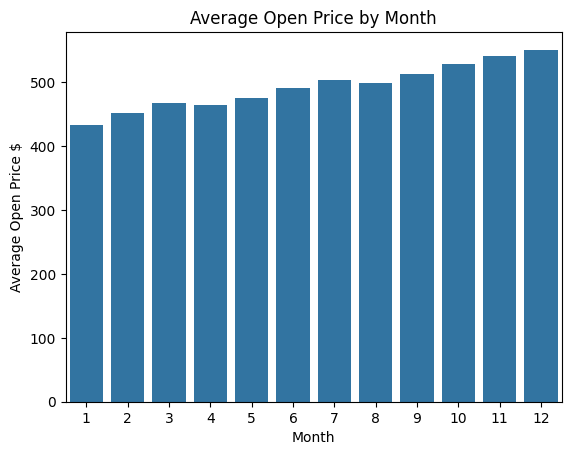

In [ ]:
sns.barplot(x=months, y=monthly_means['Open'])
plt.xlabel('Month')
plt.ylabel('Average Open Price $')
plt.title('Average Open Price by Month')
plt.show()

###Close

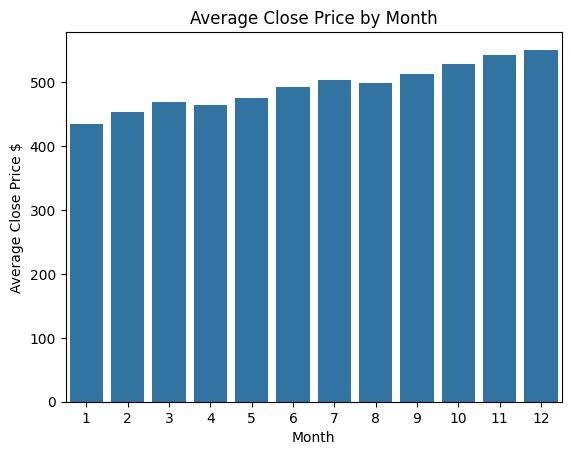

In [ ]:
sns.barplot(x = months, y = monthly_means["Close"])
plt.xlabel('Month')
plt.ylabel('Average Close Price $')
plt.title("Average Close Price by Month")
plt.show()

###High

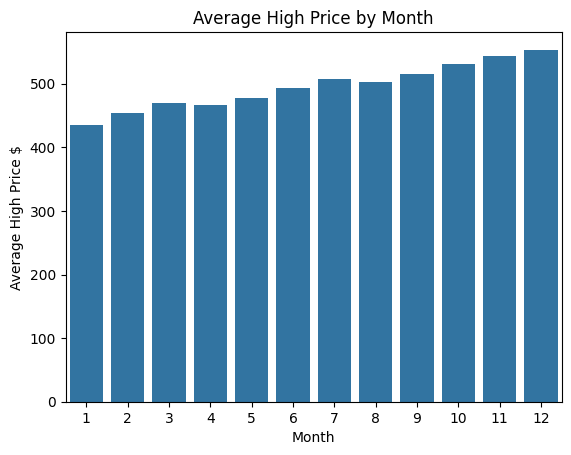

In [ ]:
sns.barplot(x = months, y = monthly_means["High"])
plt.xlabel('Month')
plt.ylabel('Average High Price $')
plt.title("Average High Price by Month")
plt.show()

###Low

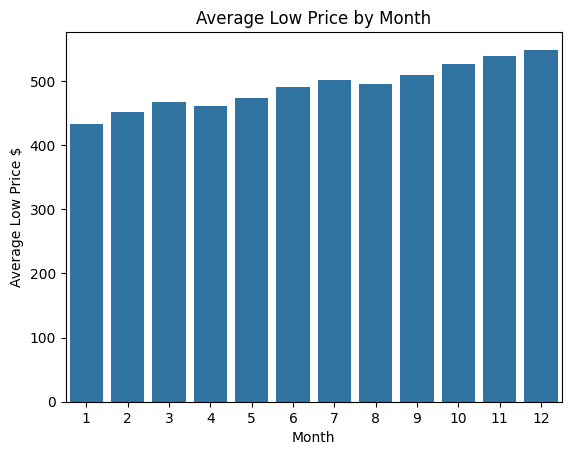

In [ ]:
sns.barplot(x = months, y = monthly_means["Low"])
plt.xlabel('Month')
plt.ylabel('Average Low Price $')
plt.title("Average Low Price by Month")
plt.show()

###Volume

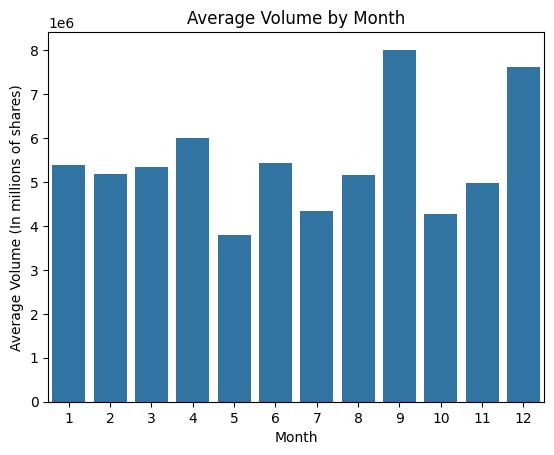

In [ ]:
sns.barplot(x = months, y = monthly_means["Volume"])
plt.xlabel('Month')
plt.ylabel('Average Volume (In millions of shares)')
plt.title("Average Volume by Month")
plt.show()

###Weekdays statistics

In [ ]:
days_of_the_week = snp.index.day_of_week

In [ ]:
# Calculate the mean close price for every day of the week
weekly_close = snp.groupby(days_of_the_week)['Close']

In [ ]:
# A list of all the days in the week. The list is later used to order the data by the day of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

####Mean

In [ ]:
print("Mean stock price per week day for 2024")
weekly_close.mean()

Mean stock price per week day for 2024


,Close
Date,
0,496.960173
1,493.056596
2,491.892512
3,492.381334
4,494.772372


In [ ]:
snp["Day of the week"] = snp.index.day_name()

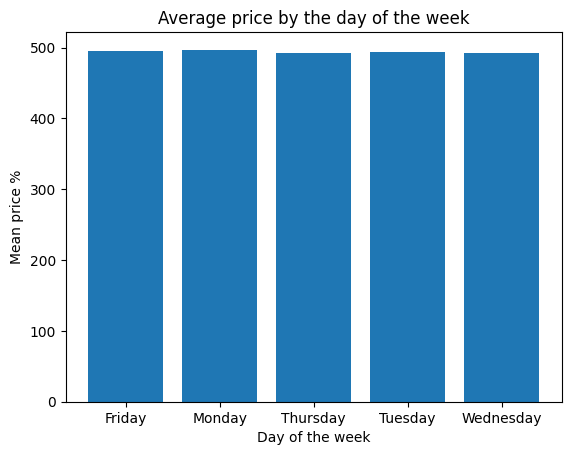

In [ ]:
groupbyday = snp.groupby('Day of the week')
df = groupbyday.mean()
plt.bar(df.index, df['Close'])
plt.xlabel('Day of the week')
plt.ylabel('Mean price %')
plt.title("Average price by the day of the week")
plt.show()

####Median

In [ ]:
print("Median stock price per week day for 2024")
weekly_close.median()

Median stock price per week day for 2024


,Close
Date,
0,497.780457
1,495.013336
2,493.462173
3,492.680435
4,494.087463


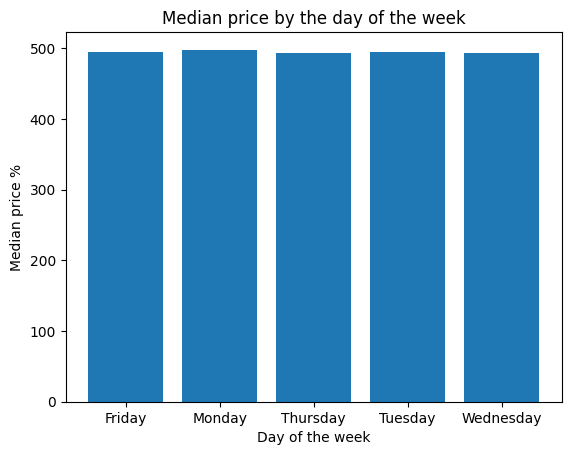

In [ ]:
groupbyday = snp.groupby('Day of the week')
df = groupbyday.median()
plt.bar(df.index, df['Close'])
plt.xlabel('Day of the week')
plt.ylabel('Median price %')
plt.title("Median price by the day of the week")
plt.show()

####High

In [ ]:
print("Highest stock price per week day for 2024")
weekly_close.max()

Highest stock price per week day for 2024


,Close
Date,
0,556.010315
1,553.677795
2,556.857605
3,555.930603
4,557.037048


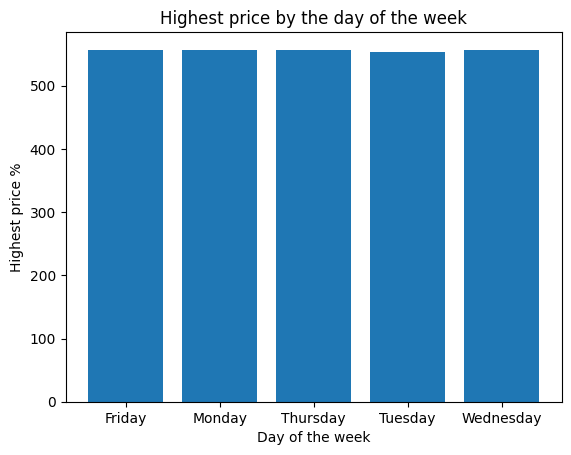

In [ ]:
groupbyday = snp.groupby('Day of the week')
df = groupbyday.max()
plt.bar(df.index, df['Close'])
plt.xlabel('Day of the week')
plt.ylabel('Highest price %')
plt.title("Highest price by the day of the week")
plt.show()

---

##Corolation

In [ ]:
snp.select_dtypes(['number']).corr()

Price,Close,High,Low,Open,Volume
Price,,,,,
Close,1.000000,0.997757,0.998696,0.996356,0.049561
High,0.997757,1.000000,0.997673,0.998705,0.068253
Low,0.998696,0.997673,1.000000,0.997820,0.052002
Open,0.996356,0.998705,0.997820,1.000000,0.066838
Volume,0.049561,0.068253,0.052002,0.066838,1.000000


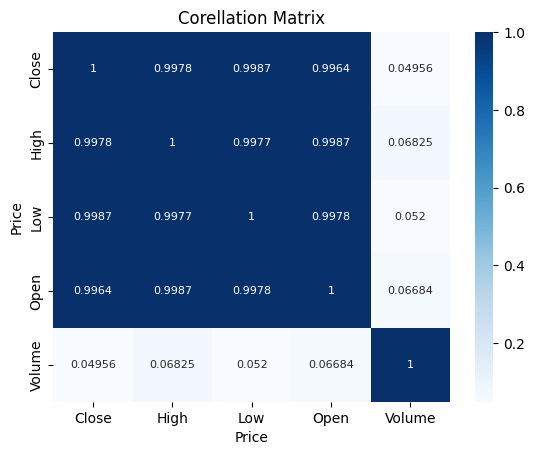

In [ ]:
sns.heatmap(snp.select_dtypes(['number']).corr(),
            annot= True, fmt='.4g', annot_kws={"size": 8}, cmap= 'Blues')
plt.title("Corellation Matrix")
plt.show()

There is close perfect corrolation between the different prices, and close to no corrolation between the stock price and it's volume

####Analizing the corrolation between the Open and Close prices

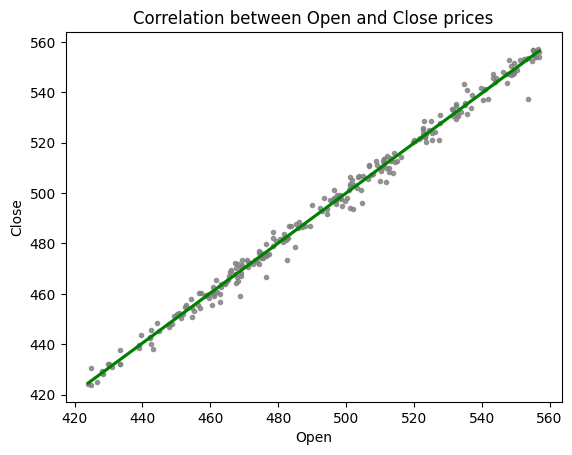

In [ ]:
sns.regplot(x = snp["Open"], y = snp["Close"], marker = '.',
            scatter_kws={'color' : 'gray'}, line_kws={'color' : 'Green'})
plt.title("Correlation between Open and Close prices")
plt.show()

We can see a corolation of 1 between the Open and Close price of the stock throught 2024

---

##Quarter statisitcs

###Q1

In [ ]:
# 1st of January was a holiday so we took information from the second of January
q1_open = get_stock_statistics('full', '2024-01-02', "Open")
q1_close = get_stock_statistics('full', '2024-01-02', "Close")
q1_high = get_stock_statistics('full', '2024-01-02', "High")
q1_low = get_stock_statistics('full', '2024-01-02', "Low")
q1_volume = get_stock_statistics('full', '2024-01-02', "Volume")

# Print the values
print("Q1 start statistics :")
print(f"Open : ${q1_open:.2f}")
print(f"Close : ${q1_close:.2f}")
print(f"High : ${q1_high:.2f}")
print(f"Low : ${q1_low:.2f}")
print(f"Vloume : {int(q1_volume)} stocks per day")

Q1 start statistics :
Open : $428.28
Close : $428.38
High : $429.62
Low : $426.75
Vloume : 9076000 stocks per day


###Q2

In [ ]:
q2_open = get_stock_statistics('full', '2024-04-01', "Open")
q2_close = get_stock_statistics('full', '2024-04-01', "Close")
q2_high = get_stock_statistics('full', '2024-04-01', "High")
q2_low = get_stock_statistics('full', '2024-04-01', "Low")
q2_volume = get_stock_statistics('full', '2024-04-01', "Volume")

# Print the values
print("Q2 start statistics :")
print(f"Open : ${q2_open:.2f}")
print(f"Close : ${q2_close:.2f}")
print(f"High : ${q2_high:.2f}")
print(f"Low : ${q2_low:.2f}")
print(f"Vloume : {int(q2_volume)} stocks per day")

Q2 start statistics :
Open : $476.72
Close : $475.36
High : $477.23
Low : $474.14
Vloume : 5734000 stocks per day


###Q3

In [ ]:
q3_open = get_stock_statistics('full', '2024-07-01', "Open")
q3_close = get_stock_statistics('full', '2024-07-01', "Close")
q3_high = get_stock_statistics('full', '2024-07-01', "High")
q3_low = get_stock_statistics('full', '2024-07-01', "Low")
q3_volume = get_stock_statistics('full', '2024-07-01', "Volume")

# Print the values
print("Q3 start statistics :")
print(f"Open : ${q3_open:.2f}")
print(f"Close : ${q3_close:.2f}")
print(f"High : ${q3_high:.2f}")
print(f"Low : ${q3_low:.2f}")
print(f"Vloume : {int(q3_volume)} stocks per day")

Q3 start statistics :
Open : $498.34
Close : $498.13
High : $498.53
Low : $495.47
Vloume : 4368500 stocks per day


###Q4

In [ ]:
q4_open = get_stock_statistics('full', '2024-10-01', "Open")
q4_close = get_stock_statistics('full', '2024-10-01', "Close")
q4_high = get_stock_statistics('full', '2024-10-01', "High")
q4_low = get_stock_statistics('full', '2024-10-01', "Low")
q4_volume = get_stock_statistics('full', '2024-10-01', "Volume")

# Print the values
print("Q4 start statistics :")
print(f"Open : ${q4_open:.2f}")
print(f"Close : ${q4_close:.2f}")
print(f"High : ${q4_high:.2f}")
print(f"Low : ${q4_low:.2f}")
print(f"Vloume : {int(q4_volume)} stocks per day")

Q4 start statistics :
Open : $525.36
Close : $521.07
High : $525.42
Low : $518.57
Vloume : 9198700 stocks per day


###Pie Chart 🎂

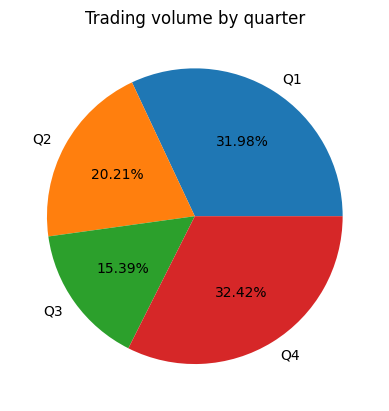

In [ ]:
# put all the data about the trading volume into one variable
volume_per_quarter = [q1_volume, q2_volume, q3_volume, q4_volume]
# the quarters to later put it on the chart
keys = ['Q1', 'Q2', 'Q3', 'Q4']

# plotting data on chart
plt.pie(volume_per_quarter, labels=keys, autopct='%.2f%%')
plt.title("Trading volume by quarter")
plt.show()

---


##<u>**Part 4**<u/>

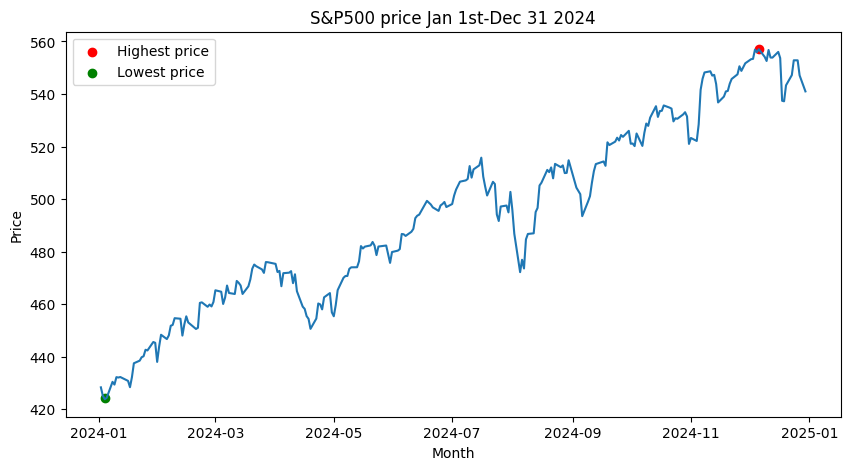

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(snp.index, snp['Close'])
# Add markers for the highest and lowest prices
# Highest price of the year
plt.scatter(x = snp.loc[snp['Close'].idxmax()].name,
            y = snp.loc[snp['High'].idxmax()]['Close'],
            color='red', label='Highest price')
# Lowest price of the year
plt.scatter(x = snp.loc[snp['Close'].idxmin()].name,
            y = snp.loc[snp['High'].idxmin()]['Close'],
            color='green', label='Lowest price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('S&P500 price Jan 1st-Dec 31 2024')
plt.legend()
plt.show()

In [ ]:
snp.loc[snp['Close'].idxmax()]

,2024-12-06
Price,
Close,557.037048
High,558.173426
Low,556.299419
Open,556.688129
Volume,5134900
Day of the week,Friday


###Identifying odds

Highest price of the year

In [ ]:
snp.loc[snp['High'].idxmax()]

,2024-12-06
Price,
Close,557.037048
High,558.173426
Low,556.299419
Open,556.688129
Volume,5134900
Day of the week,Friday


Lowest price of the year

In [ ]:
snp.loc[snp['High'].idxmin()]

,2024-01-05
Price,
Close,424.3992
High,426.689066
Low,423.076596
Open,424.014248
Volume,5723100
Day of the week,Friday


# **PART 4**

1.



<ipython-input-61-ca8b9a8fc44f>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


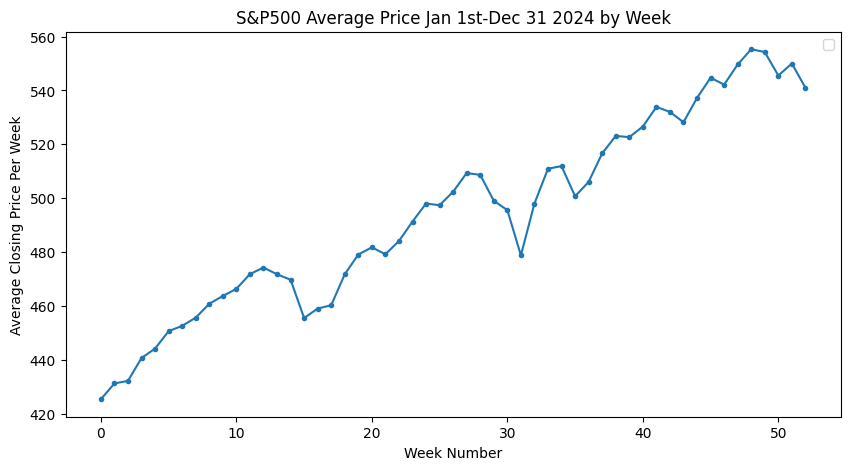

In [ ]:
plt.figure(figsize=(10, 5))

gbweek = snp.groupby(snp.index.to_period('W'))

#plot the average close price with week numbers
plt.plot(list(range(len(gbweek['Close'].mean()))),
         gbweek['Close'].mean(), marker= '.')

#labels and title
plt.xlabel('Week Number')
plt.ylabel('Average Closing Price Per Week')
plt.title('S&P500 Average Price Jan 1st-Dec 31 2024 by Week')
plt.legend()
plt.show()

2.


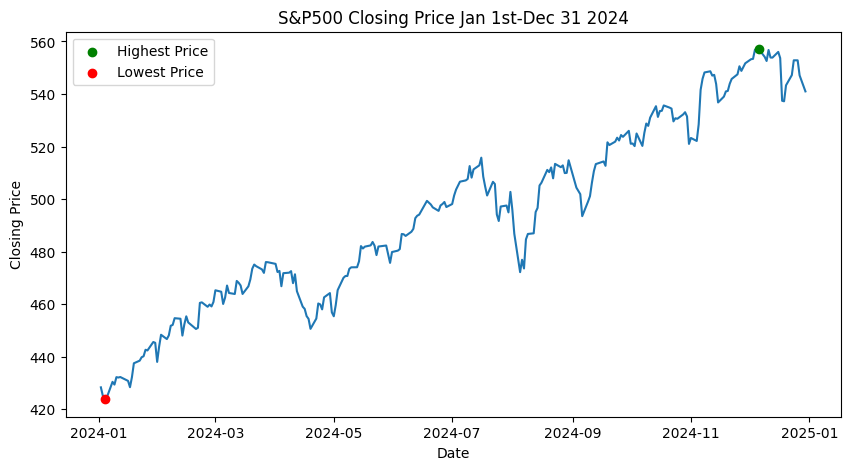

In [ ]:
plt.figure(figsize=(10, 5))
#plotting the closing price for this year
plt.plot(snp.index, snp['Close'])
#marking the highest and lowest points in this year
plt.scatter(snp['Close'].idxmax(),snp['Close'].max() ,color='green', label='Highest Price', zorder=5)
plt.scatter(snp['Close'].idxmin(),snp['Close'].min() ,color='red', label='Lowest Price', zorder=5)
#labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P500 Closing Price Jan 1st-Dec 31 2024')
plt.legend()
plt.show()

3.

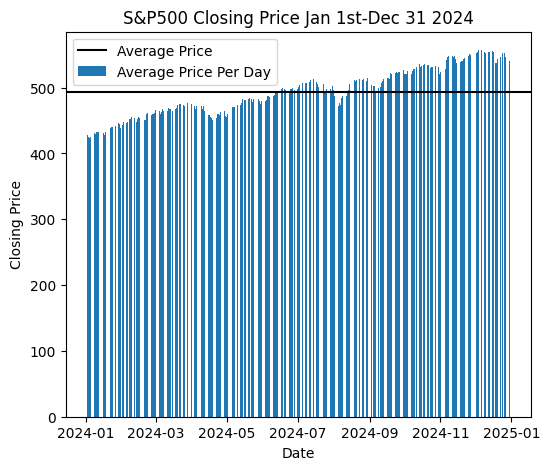

In [ ]:
plt.figure(figsize=(6, 5))
#bar chart for closing price each day
plt.bar(snp.index, snp['Close'], label= 'Average Price Per Day')
#line that marks the average closing price
plt.axhline(snp['Close'].mean(), color= 'black', label= 'Average Price')
#labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P500 Closing Price Jan 1st-Dec 31 2024')
plt.legend()
plt.show()

4.

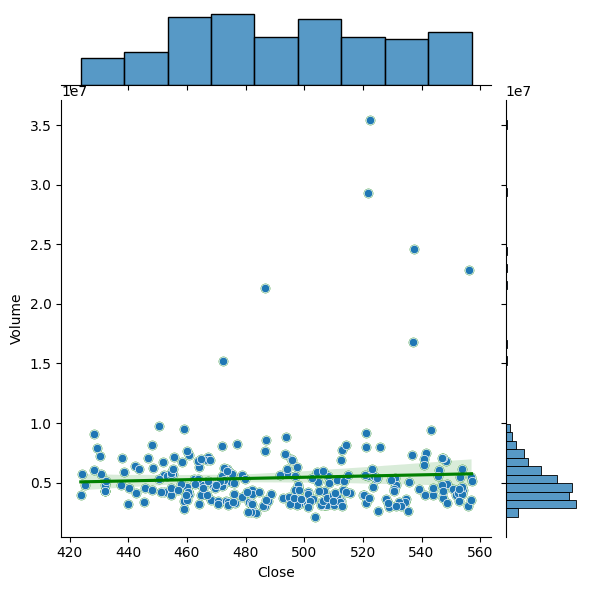

In [ ]:
sns.jointplot(x = 'Close', y = 'Volume', data = snp, zorder = 2)
sns.regplot(x = 'Close', y = 'Volume', data = snp, color = 'green')
plt.show()

5.

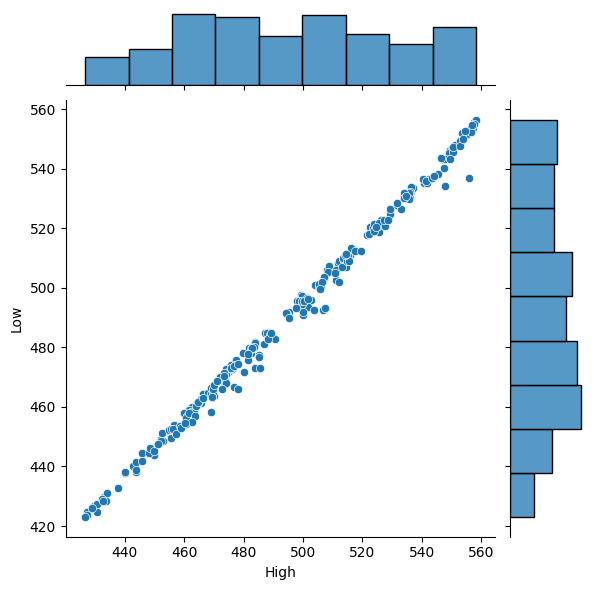

In [ ]:
sns.jointplot(x = 'High', y = 'Low', data = snp)
plt.show()

#The end!